In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import geopy

from pprint import pprint


In [29]:
path1 = "CSV/Traffic_Crashes_-_Crashes.csv"
path2 = "CSV/Traffic_Crashes_-_Vehicles.csv"

In [30]:
crash_data = pd.read_csv(path1)
crash_data.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",03/25/2019 03:17:00 PM,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,121.0,NaN,NaN,NaN,NaN,NaN,NaN,2,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",09/05/2018 09:00:00 AM,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,1712.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/15/2022 12:50:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,1123.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,NaN,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",09/01/2022 11:30:00 AM,DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,3939,W,79TH ST,834.0,Y,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,11,2,8,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/20/2022 11:00:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,1811.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)


In [31]:
crash_data["MOST_SEVERE_INJURY"].unique()

array(['REPORTED, NOT EVIDENT', 'NO INDICATION OF INJURY',
       'NONINCAPACITATING INJURY', 'INCAPACITATING INJURY', nan, 'FATAL'],
      dtype=object)

In [32]:
crash_data.keys()

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [33]:
crash_data_df = crash_data.loc[:, ["CRASH_RECORD_ID", "CRASH_DATE", "POSTED_SPEED_LIMIT", "TRAFFIC_CONTROL_DEVICE", 
                                   "DEVICE_CONDITION", "WEATHER_CONDITION", "LIGHTING_CONDITION",
                                   "FIRST_CRASH_TYPE" ,"TRAFFICWAY_TYPE", "LANE_CNT", "ROADWAY_SURFACE_COND",
                                   "ROAD_DEFECT", "CRASH_TYPE", "DAMAGE", "PRIM_CONTRIBUTORY_CAUSE", "SEC_CONTRIBUTORY_CAUSE",
                                   "STREET_NO","STREET_DIRECTION", "STREET_NAME", "MOST_SEVERE_INJURY", 
                                   "INJURIES_TOTAL", "INJURIES_FATAL", "INJURIES_INCAPACITATING", 
                                   "INJURIES_NON_INCAPACITATING", 
                                   'INJURIES_NO_INDICATION', 
                                   'CRASH_DAY_OF_WEEK', 'LATITUDE', 'LONGITUDE', 'LOCATION']]
crash_data_df

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_NO_INDICATION,CRASH_DAY_OF_WEEK,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,3939,W,79TH ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,3.0,2,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693090,19d66ccf73917206f2e91092e8976a300b1f84daa8833e...,11/24/2022 12:01:00 AM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,OTHER,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),UNABLE TO DETERMINE,3201,W,FILLMORE ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,5,41.868114,-87.705847,POINT (-87.705846742577 41.868113701907)
693091,58836410941fb22412eaeaf1e8111f5d3c0ab0c68fd155...,11/24/2022 03:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,UNABLE TO DETERMINE,1730,W,EDMAIRE ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,5,41.686263,-87.664858,POINT (-87.664858007912 41.686263191946)
693092,8588fb5bf485485db492c6d13fc5d2ae8f722ef423e7e1...,11/24/2022 01:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,Y-INTERSECTION,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,5679,N,RIDGE AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,5,41.985267,-87.662517,POINT (-87.662516804053 41.985266769831)
693093,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,11/24/2022 06:47:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,50,W,HARRISON ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,

In [34]:
crash_data_df = crash_data_df.rename(columns ={"CRASH_DATE" : "Crash Date",
                                               "CRASH_RECORD_ID" : "Crash Record ID",
                                               "POSTED_SPEED_LIMIT" : "Posted Speed Limit",
                                               "TRAFFIC_CONTROL_DEVICE": "Traffic Control Device",
                                               "DEVICE_CONDITION" : "Device Condition",
                                               "WEATHER_CONDITION": "Weather Condition",
                                               "LIGHTING_CONDITION" : "Lighting Condition",
                                               "FIRST_CRASH_TYPE" : "Crash Type",
                                               "TRAFFICWAY_TYPE": "Street Type", 
                                               "LANE_CNT" : "Number of Lanes", 
                                               "ROADWAY_SURFACE_COND": "Roadway Condition",
                                               "ROAD_DEFECT" : "Road Defect", 
                                               "CRASH_TYPE" : "Severity", 
                                               "DAMAGE": "Damages", 
                                               "PRIM_CONTRIBUTORY_CAUSE": "Primary Contributory Cause", 
                                               "SEC_CONTRIBUTORY_CAUSE" : "Secondary Contributory Cause",
                                               "STREET_NO" : "Street Number",
                                               "STREET_DIRECTION" : "Street Direction", 
                                               "STREET_NAME": "Street Name", 
                                               "MOST_SEVERE_INJURY": "Injury Type", 
                                               "INJURIES_TOTAL": "Total Injuries", 
                                               "INJURIES_FATAL" : "Fatal Injuries", 
                                               "INJURIES_INCAPACITATING" : "Severe Injuries", 
                                               "INJURIES_NON_INCAPACITATING" : "Minor Injuries", 
                                               "INJURIES_NO_INDICATION" : "No Injuries Recorded", 
                                               "CRASH_DAY_OF_WEEK": "Day of Week",
                                               "LATITUDE": "Latitude", 
                                               "LONGITUDE": "Longitude",
                                               "LOCATION" : "Location",
                                              })
crash_data_df

,Crash Record ID,Crash Date,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,3939,W,79TH ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,3.0,2,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693090,19d66ccf73917206f2e91092e8976a300b1f84daa8833e...,11/24/2022 12:01:00 AM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,OTHER,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),UNABLE TO DETERMINE,3201,W,FILLMORE ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,5,41.868114,-87.705847,POINT (-87.705846742577 41.868113701907)
693091,58836410941fb22412eaeaf1e8111f5d3c0ab0c68fd155...,11/24/2022 03:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,UNABLE TO DETERMINE,1730,W,EDMAIRE ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,5,41.686263,-87.664858,POINT (-87.664858007912 41.686263191946)
693092,8588fb5bf485485db492c6d13fc5d2ae8f722ef423e7e1...,11/24/2022 01:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,Y-INTERSECTION,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,5679,N,RIDGE AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,5,41.985267,-87.662517,POINT (-87.662516804053 41.985266769831)
693093,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,11/24/2022 06:47:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,50,W,HARRISON ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,5,41.874644,-87.629649,POINT (

In [35]:
vehicle_data = pd.read_csv(path2)
vehicle_data
# Sunday is 1

C:\Users\paull\AppData\Local\Temp\ipykernel_3668\1644759922.py:1: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_data = pd.read_csv(path2)


,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,TOWED_I,FIRE_I,OCCUPANT_CNT,EXCEED_SPEED_LIMIT_I,TOWED_BY,TOWED_TO,AREA_00_I,AREA_01_I,AREA_02_I,AREA_03_I,AREA_04_I,AREA_05_I,AREA_06_I,AREA_07_I,AREA_08_I,AREA_09_I,AREA_10_I,AREA_11_I,AREA_12_I,AREA_99_I,FIRST_CONTACT_POINT,CMV_ID,USDOT_NO,CCMC_NO,ILCC_NO,COMMERCIAL_SRC,GVWR,CARRIER_NAME,CARRIER_STATE,CARRIER_CITY,HAZMAT_PLACARDS_I,HAZMAT_NAME,UN_NO,HAZMAT_PRESENT_I,HAZMAT_REPORT_I,HAZMAT_REPORT_NO,MCS_REPORT_I,MCS_REPORT_NO,HAZMAT_VIO_CAUSE_CRASH_I,MCS_VIO_CAUSE_CRASH_I,IDOT_PERMIT_NO,WIDE_LOAD_I,TRAILER1_WIDTH,TRAILER2_WIDTH,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,YARIS,IL,2010.0,NONE,UNKNOWN/NA,PERSONAL,N,PARKED,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,ROOF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),SIERRA,IL,2008.0,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,N,PARKED,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,ROOF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,ENCORE,IL,NaN,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT-RIGHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412211,1508506,6c26e8407561884de71818e40d831baa8933a3f1d51081...,JG135050,01/21/2023 12:59:00 PM,1,DRIVER,NaN,1434178.0,NaN,SCION,TC,IL,2008.0,NONE,PASSENGER,PERSONAL,N,CHANGING LANES,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,TOTAL (ALL AREAS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1412212,1508507,6c26e8407561884de71818e40d831baa8933a3f1d51081...,JG135050,01/21/2023 12:59:00 PM,2,DRIVER,NaN,1434196.0,NaN,JEEP,CHEROKEE,IL,2018.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REAR-RIGHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [36]:
vehicle_data.keys()

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       '

In [37]:
vehicle_data_df = vehicle_data.loc[:,['CRASH_RECORD_ID','CRASH_DATE',
                                      'NUM_PASSENGERS','MAKE','MODEL',
                                      'VEHICLE_YEAR','VEHICLE_TYPE','TRAVEL_DIRECTION',
                                      'MANEUVER','OCCUPANT_CNT','EXCEED_SPEED_LIMIT_I']]
vehicle_data_df = vehicle_data_df.rename(columns={'CRASH_RECORD_ID':"Crash Record ID",
                                                    'CRASH_DATE':"Crash Date",
                                                    'NUM_PASSENGERS':"Number of Passengers",
                                                    'MAKE':"Make",
                                                    'MODEL':"Model",
                                                    'VEHICLE_YEAR':"Vehicle Year",
                                                    'VEHICLE_TYPE':"Vehicle Type",
                                                    'TRAVEL_DIRECTION':"Travel Direction",
                                                    'MANEUVER':"Maneuver",
                                                    'OCCUPANT_CNT':"Number of Occupants",
                                                    'EXCEED_SPEED_LIMIT_I':"Exceeded Speed Limit"})
vehicle_data_df

,Crash Record ID,Crash Date,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,NaN,INFINITI,UNKNOWN,2017.0,PASSENGER,N,STRAIGHT AHEAD,1.0,NaN
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,NaN,HONDA,CIVIC,2016.0,PASSENGER,N,STRAIGHT AHEAD,1.0,NaN
2,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,NaN,TOYOTA,YARIS,2010.0,UNKNOWN/NA,N,PARKED,0.0,NaN
3,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,NaN,GENERAL MOTORS CORPORATION (GMC),SIERRA,2008.0,UNKNOWN/NA,N,PARKED,0.0,NaN
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,NaN,BUICK,ENCORE,NaN,PASSENGER,W,STRAIGHT AHEAD,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1412211,6c26e8407561884de71818e40d831baa8933a3f1d51081...,01/21/2023 12:59:00 PM,NaN,SCION,TC,2008.0,PASSENGER,N,CHANGING LANES,1.0,NaN
1412212,6c26e8407561884de71818e40d831baa8933a3f1d51081...,01/21/2023 12:59:00 PM,NaN,JEEP,CHEROKEE,2018.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,NaN
1412213,03a2dc75ecec7d98ff335864b6d6e40a68e179a972e31c...,01/21/2023 09:00:00 PM,NaN,DODGE,DART,2016.0,PASSENGER,N,STRAIGHT AHEAD,1.0,NaN
1412214,03a2dc75ecec7d98ff335864b6d6e40a68e179a972e31c...,01/21/2023 09:00:00 PM,2.0,TOYOTA,RAV4,2017.0,PASSENGER,N,SLOW/STOP IN TRAFFIC,3.0,NaN


In [38]:
chicago_df = pd.merge(crash_data_df, vehicle_data_df, on="Crash Record ID")
pd.options.display.max_columns = 500
chicago_df

,Crash Record ID,Crash Date_x,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Crash Date_y,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),03/25/2019 02:43:00 PM,1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,NaN
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),03/25/2019 02:43:00 PM,NaN,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,NaN
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),09/05/2018 08:40:00 AM,NaN,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,NaN
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),09/05/2018 08:40:00 AM,NaN,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,NaN
4,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761),07/15/2022 12:45:00 AM,NaN,HYUNDAI,OTHER (EXPLAIN IN NARRATIVE),NaN,UNKNOWN/NA,W,UNKNOWN/NA,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412209,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,11/24/2022 06:47:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,50,W,HARRISON ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,5,41.874644,-87.629649,POINT (-87.629648503841 41.874644283241),11/24/2022 06:47:00 AM,NaN,UNKNOWN,OTHER (EXPLAIN IN NARRATIVE),NaN,UNKNOWN/NA,UNKNOWN,UNKNOWN/NA,1.0,NaN
1412210,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,11/24/2022 06:47:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,50,W,HARRISON ST,NO INDICATION OF INJURY,0.0,0.0,0.0,

In [39]:
chicago_df = chicago_df.drop(columns=["Crash Date_y"])

In [40]:
chicago_df = chicago_df.rename(columns={ "Crash Date_x" : "Crash Date"})

In [41]:
newcol = []
newcol2 = []
for date in chicago_df["Crash Date"]:
    newcol.append(date.split()[0])
    newcol2.append((date.split()[1],date.split()[2]))
chicago_df["Date"] = newcol
chicago_df["Time"] = newcol2
chicago_df

,Crash Record ID,Crash Date,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,NaN,03/25/2019,"(02:43:00, PM)"
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,2,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),NaN,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,NaN,03/25/2019,"(02:43:00, PM)"
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),NaN,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,NaN,09/05/2018,"(08:40:00, AM)"
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,4,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),NaN,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,NaN,09/05/2018,"(08:40:00, AM)"
4,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,6,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761),NaN,HYUNDAI,OTHER (EXPLAIN IN NARRATIVE),NaN,UNKNOWN/NA,W,UNKNOWN/NA,1.0,NaN,07/15/2022,"(12:45:00, AM)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412209,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,11/24/2022 06:47:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,50,W,HARRISON ST,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,5,41.874644,-87.629649,POINT (-87.629648503841 41.874644283241),NaN,UNKNOWN,OTHER (EXPLAIN IN NARRATIVE),NaN,UNKNOWN/NA,UNKNOWN,UNKNOWN/NA,1.0,NaN,11/24/2022,"(06:47:00, AM)"
1412210,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,11/24/2022 06:47:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,50,W,HARRISON ST,NO INDI

In [42]:
chicago_df.columns

Index(['Crash Record ID', 'Crash Date', 'Posted Speed Limit',
       'Traffic Control Device', 'Device Condition', 'Weather Condition',
       'Lighting Condition', 'Crash Type', 'Street Type', 'Number of Lanes',
       'Roadway Condition', 'Road Defect', 'Severity', 'Damages',
       'Primary Contributory Cause', 'Secondary Contributory Cause',
       'Street Number', 'Street Direction', 'Street Name', 'Injury Type',
       'Total Injuries', 'Fatal Injuries', 'Severe Injuries', 'Minor Injuries',
       'No Injuries Recorded', 'Day of Week', 'Latitude', 'Longitude',
       'Location', 'Number of Passengers', 'Make', 'Model', 'Vehicle Year',
       'Vehicle Type', 'Travel Direction', 'Maneuver', 'Number of Occupants',
       'Exceeded Speed Limit', 'Date', 'Time'],
      dtype='object')

In [43]:
replace_df = chicago_df
replace_df["Number of Passengers"] = replace_df["Number of Passengers"].fillna(0)
replace_df["Exceeded Speed Limit"] = replace_df["Exceeded Speed Limit"].fillna("UNKNOWN")
replace_df["Vehicle Year"] = replace_df["Vehicle Year"].fillna("UNKNOWN")
replace_df["Number of Occupants"] = replace_df["Number of Occupants"].fillna(0)
replace_df = replace_df.replace({"Day of Week":{1:"Sunday",2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday",7:"Saturday"}})
replace_df = replace_df.drop(columns=["Crash Date"])
replace_df.head()

,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
4,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761),0.0,HYUNDAI,OTHER (EXPLAIN IN NARRATIVE),UNKNOWN,UNKNOWN/NA,W,UNKNOWN/NA,1.0,UNKNOWN,07/15/2022,"(12:45:00, AM)"


In [44]:
print(chicago_df["Number of Occupants"].unique())
print(chicago_df["Vehicle Type"].unique())
chicago_df.loc[chicago_df["Number of Occupants"] == 60,:]

[ 2.  1.  0.  3.  5.  4.  6.  7.  9.  8. 12. 36. 13. 18. 10. 11. 28. 26.
 14. 15. 19. 30. 20. 29. 47. 16. 41. 44. 17. 21. 60. 37. 23. 99. 33. 27.
 43. 39. 22. 34. 25. 31. 24. 38. 35.]
['PASSENGER' 'SPORT UTILITY VEHICLE (SUV)' 'UNKNOWN/NA'
 'TRACTOR W/ SEMI-TRAILER' 'PICKUP' nan 'TRUCK - SINGLE UNIT'
 'VAN/MINI-VAN' 'OTHER' 'BUS OVER 15 PASS.' 'AUTOCYCLE'
 'MOTORCYCLE (OVER 150CC)' 'BUS UP TO 15 PASS.' 'TRACTOR W/O SEMI-TRAILER'
 'SINGLE UNIT TRUCK WITH TRAILER' 'OTHER VEHICLE WITH TRAILER'
 'MOPED OR MOTORIZED BICYCLE' '3-WHEELED MOTORCYCLE (2 REAR WHEELS)'
 'MOTOR DRIVEN CYCLE' 'FARM EQUIPMENT' 'ALL-TERRAIN VEHICLE (ATV)'
 'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)' 'SNOWMOBILE']


,Crash Record ID,Crash Date,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time
409721,31ecf6862c691ff12d3856213b902c146b07337b42a569...,03/16/2018 10:17:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",NOT APPLICABLE,26,E,ROOSEVELT RD,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,61.0,6,41.867539,-87.626208,POINT (-87.626208480722 41.867538626623),59.0,UNKNOWN,UNKNOWN,2015.0,BUS OVER 15 PASS.,W,STRAIGHT AHEAD,60.0,UNKNOWN,03/16/2018,"(10:17:00, AM)"


In [45]:
car_df = replace_df.loc[replace_df["Vehicle Type"].isin(["PASSENGER",'SPORT UTILITY VEHICLE (SUV)',
                                                          'TRUCK - SINGLE UNIT', 'VAN/MINI-VAN',
                                                          'PICKUP'])]
print(len(car_df))
car_df.head()

1191044


,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
8,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),0.0,DODGE,JOURNEY,2017.0,PASSENGER,S,SLOW/STOP IN TRAFFIC,1.0,UNKNOWN,07/15/2022,"(06:50:00, PM)"


In [46]:
print(car_df["Vehicle Type"].unique())
print(car_df.columns)

['PASSENGER' 'SPORT UTILITY VEHICLE (SUV)' 'PICKUP' 'TRUCK - SINGLE UNIT'
 'VAN/MINI-VAN']
Index(['Crash Record ID', 'Posted Speed Limit', 'Traffic Control Device',
       'Device Condition', 'Weather Condition', 'Lighting Condition',
       'Crash Type', 'Street Type', 'Number of Lanes', 'Roadway Condition',
       'Road Defect', 'Severity', 'Damages', 'Primary Contributory Cause',
       'Secondary Contributory Cause', 'Street Number', 'Street Direction',
       'Street Name', 'Injury Type', 'Total Injuries', 'Fatal Injuries',
       'Severe Injuries', 'Minor Injuries', 'No Injuries Recorded',
       'Day of Week', 'Latitude', 'Longitude', 'Location',
       'Number of Passengers', 'Make', 'Model', 'Vehicle Year', 'Vehicle Type',
       'Travel Direction', 'Maneuver', 'Number of Occupants',
       'Exceeded Speed Limit', 'Date', 'Time'],
      dtype='object')


In [47]:
car_df[["Total Injuries", "Fatal Injuries",'Severe Injuries', 'Minor Injuries', 'No Injuries Recorded']]

,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded
0,1.0,0.0,0.0,0.0,2.0
1,1.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,2.0
8,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...
1412206,0.0,0.0,0.0,0.0,1.0
1412208,0.0,0.0,0.0,0.0,2.0
1412210,0.0,0.0,0.0,0.0,1.0
1412211,0.0,0.0,0.0,0.0,4.0


In [48]:
replace_df.isna().sum()


Crash Record ID                       0
Posted Speed Limit                    0
Traffic Control Device                0
Device Condition                      0
Weather Condition                     0
Lighting Condition                    0
Crash Type                            0
Street Type                           0
Number of Lanes                 1007560
Roadway Condition                     0
Road Defect                           0
Severity                              0
Damages                               0
Primary Contributory Cause            0
Secondary Contributory Cause          0
Street Number                         0
Street Direction                      8
Street Name                           2
Injury Type                        2525
Total Injuries                     2504
Fatal Injuries                     2504
Severe Injuries                    2504
Minor Injuries                     2504
No Injuries Recorded               2504
Day of Week                           0


In [49]:
print(chicago_df["Number of Occupants"].unique())
print(chicago_df["Vehicle Type"].unique())
chicago_df.loc[chicago_df["Number of Occupants"] == 60,:]

[ 2.  1.  0.  3.  5.  4.  6.  7.  9.  8. 12. 36. 13. 18. 10. 11. 28. 26.
 14. 15. 19. 30. 20. 29. 47. 16. 41. 44. 17. 21. 60. 37. 23. 99. 33. 27.
 43. 39. 22. 34. 25. 31. 24. 38. 35.]
['PASSENGER' 'SPORT UTILITY VEHICLE (SUV)' 'UNKNOWN/NA'
 'TRACTOR W/ SEMI-TRAILER' 'PICKUP' nan 'TRUCK - SINGLE UNIT'
 'VAN/MINI-VAN' 'OTHER' 'BUS OVER 15 PASS.' 'AUTOCYCLE'
 'MOTORCYCLE (OVER 150CC)' 'BUS UP TO 15 PASS.' 'TRACTOR W/O SEMI-TRAILER'
 'SINGLE UNIT TRUCK WITH TRAILER' 'OTHER VEHICLE WITH TRAILER'
 'MOPED OR MOTORIZED BICYCLE' '3-WHEELED MOTORCYCLE (2 REAR WHEELS)'
 'MOTOR DRIVEN CYCLE' 'FARM EQUIPMENT' 'ALL-TERRAIN VEHICLE (ATV)'
 'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)' 'SNOWMOBILE']


,Crash Record ID,Crash Date,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time
409721,31ecf6862c691ff12d3856213b902c146b07337b42a569...,03/16/2018 10:17:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",NOT APPLICABLE,26,E,ROOSEVELT RD,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,61.0,6,41.867539,-87.626208,POINT (-87.626208480722 41.867538626623),59.0,UNKNOWN,UNKNOWN,2015.0,BUS OVER 15 PASS.,W,STRAIGHT AHEAD,60.0,UNKNOWN,03/16/2018,"(10:17:00, AM)"


In [50]:
car_df = replace_df.loc[replace_df["Vehicle Type"].isin(["PASSENGER",'SPORT UTILITY VEHICLE (SUV)',
                                                          'TRUCK - SINGLE UNIT', 'VAN/MINI-VAN',
                                                          'PICKUP'])]
print(len(car_df))
car_df.head()

1191044


,Crash Record ID,Posted Speed Limit,Traffic Control Device,Device Condition,Weather Condition,Lighting Condition,Crash Type,Street Type,Number of Lanes,Roadway Condition,Road Defect,Severity,Damages,Primary Contributory Cause,Secondary Contributory Cause,Street Number,Street Direction,Street Name,Injury Type,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded,Day of Week,Latitude,Longitude,Location,Number of Passengers,Make,Model,Vehicle Year,Vehicle Type,Travel Direction,Maneuver,Number of Occupants,Exceeded Speed Limit,Date,Time
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),1.0,CHEVROLET,CRUZE,2017.0,PASSENGER,W,TURNING LEFT,2.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,2.0,Monday,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER,W,STRAIGHT AHEAD,1.0,UNKNOWN,03/25/2019,"(02:43:00, PM)"
2,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002.0,SPORT UTILITY VEHICLE (SUV),N,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
3,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Wednesday,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),0.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014.0,PASSENGER,SE,STRAIGHT AHEAD,1.0,UNKNOWN,09/05/2018,"(08:40:00, AM)"
8,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,2.0,Friday,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),0.0,DODGE,JOURNEY,2017.0,PASSENGER,S,SLOW/STOP IN TRAFFIC,1.0,UNKNOWN,07/15/2022,"(06:50:00, PM)"


In [51]:
print(car_df["Vehicle Type"].unique())
print(car_df.columns)

['PASSENGER' 'SPORT UTILITY VEHICLE (SUV)' 'PICKUP' 'TRUCK - SINGLE UNIT'
 'VAN/MINI-VAN']
Index(['Crash Record ID', 'Posted Speed Limit', 'Traffic Control Device',
       'Device Condition', 'Weather Condition', 'Lighting Condition',
       'Crash Type', 'Street Type', 'Number of Lanes', 'Roadway Condition',
       'Road Defect', 'Severity', 'Damages', 'Primary Contributory Cause',
       'Secondary Contributory Cause', 'Street Number', 'Street Direction',
       'Street Name', 'Injury Type', 'Total Injuries', 'Fatal Injuries',
       'Severe Injuries', 'Minor Injuries', 'No Injuries Recorded',
       'Day of Week', 'Latitude', 'Longitude', 'Location',
       'Number of Passengers', 'Make', 'Model', 'Vehicle Year', 'Vehicle Type',
       'Travel Direction', 'Maneuver', 'Number of Occupants',
       'Exceeded Speed Limit', 'Date', 'Time'],
      dtype='object')


In [52]:
car_df[["Total Injuries", "Fatal Injuries",'Severe Injuries', 'Minor Injuries', 'No Injuries Recorded']]

,Total Injuries,Fatal Injuries,Severe Injuries,Minor Injuries,No Injuries Recorded
0,1.0,0.0,0.0,0.0,2.0
1,1.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,2.0
8,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...
1412206,0.0,0.0,0.0,0.0,1.0
1412208,0.0,0.0,0.0,0.0,2.0
1412210,0.0,0.0,0.0,0.0,1.0
1412211,0.0,0.0,0.0,0.0,4.0


In [53]:
replace_df.isna().sum()

Crash Record ID                       0
Posted Speed Limit                    0
Traffic Control Device                0
Device Condition                      0
Weather Condition                     0
Lighting Condition                    0
Crash Type                            0
Street Type                           0
Number of Lanes                 1007560
Roadway Condition                     0
Road Defect                           0
Severity                              0
Damages                               0
Primary Contributory Cause            0
Secondary Contributory Cause          0
Street Number                         0
Street Direction                      8
Street Name                           2
Injury Type                        2525
Total Injuries                     2504
Fatal Injuries                     2504
Severe Injuries                    2504
Minor Injuries                     2504
No Injuries Recorded               2504
Day of Week                           0


In [54]:
replace_df["Make"].unique()

array(['CHEVROLET', 'TOYOTA MOTOR COMPANY, LTD.', 'HYUNDAI', ...,
       'VACATIONAR MOTOR HOME TRUCK', 'BALDWIN ENTERPRISES',
       'MONTE ALUMINUM TRAILER DUMP'], dtype=object)

In [56]:
replace_df["Make"].value_counts()

CHEVROLET                                               162133
UNKNOWN                                                 138224
FORD                                                    137335
NISSAN                                                  113458
HONDA                                                   100040
                                                         ...  
TRANS-TRAIL TRAILER                                          1
MORGAN TRAILER MFG. CO.                                      1
CLINTON ENGINE CORP.                                         1
MIDWEST MOBILE HOMES & TRAILER MANUFACTURING COMPANY         1
MONTE ALUMINUM TRAILER DUMP                                  1
Name: Make, Length: 1254, dtype: int64

In [57]:
replace_df["Make"].value_counts(normalize=True)

CHEVROLET                                               1.174675e-01
UNKNOWN                                                 1.001451e-01
FORD                                                    9.950103e-02
NISSAN                                                  8.220182e-02
HONDA                                                   7.248031e-02
                                                            ...     
TRANS-TRAIL TRAILER                                     7.245133e-07
MORGAN TRAILER MFG. CO.                                 7.245133e-07
CLINTON ENGINE CORP.                                    7.245133e-07
MIDWEST MOBILE HOMES & TRAILER MANUFACTURING COMPANY    7.245133e-07
MONTE ALUMINUM TRAILER DUMP                             7.245133e-07
Name: Make, Length: 1254, dtype: float64

In [63]:
# filter the 'Make' column for values over 1000
make1000 = replace_df["Make"].value_counts().loc[lambda x : x>1000]
make1000

CHEVROLET                                   162133
UNKNOWN                                     138224
FORD                                        137335
NISSAN                                      113458
HONDA                                       100040
TOYOTA MOTOR COMPANY, LTD.                   89215
DODGE                                        61558
TOYOTA                                       60918
HYUNDAI                                      58007
JEEP                                         55907
VOLKSWAGEN                                   26519
CHRYSLER                                     26373
BUICK                                        23748
LEXUS                                        20651
MERCEDES-BENZ                                19090
BMW                                          17976
MAZDA                                        17693
KIA MOTORS CORP                              17582
KIA                                          17484
CADILLAC                       

In [ ]:
# let's convert to a dataframe
make1000_df = pd.DataFrame({'Popular Makes': Make1000, 'Column2': d2})

# summarize
print('d1: mean=%.3f stdv=%.3f' % (mean(d1), std(d1)))
print('d2: mean=%.3f stdv=%.3f' % (mean(d2), std(d2)))

# plot
pyplot.scatter(d1, d2)
pyplot.show()

In [62]:
# Value Count by Make/Model
replace_df.groupby("Make")["Model"].value_counts()

Make                                                       Model                                                    
"(ASSEMBLED FROM PARTS, HOMEMADE)"                         "(ASSEMBLED FROM PARTS, HOMEMADE)"                            5
"ALLISON'S FIBERGLASS MFG., INC (PORT ORANGE., FLORIDA)."  "ALLISON'S FIBERGLASS MFG., INC (PORT ORANGE., FLORIDA)."     1
"BREMEN SPORT EQUIPMENT, INC. (BREMEN, INDIANA)"           "BREMEN SPORT EQUIPMENT, INC. (BREMEN, INDIANA)"              1
"CLASSIC MOTOR CARRIAGES, INC. (HALLANDALE, FLORIDA)"      "CLASSIC MOTOR CARRIAGES, INC. (HALLANDALE, FLORIDA)"        13
"DELOREAN (IMPORTED FROM BELFAST, NORTHERN IRELAND, UK)"   "DELOREAN (IMPORTED FROM BELFAST, NORTHERN IRELAND, UK)"      1
                                                                                                                        ..
YOUNG CORPORATION                                          YOUNG CORP.                                                   1
YUE LOONG MOTOR COMPAN

In [ ]:
make_injuries_df = pd.DataFrame(car_df[["Total Injuries", "Fatal Injuries",
                           'Severe Injuries', 'Minor Injuries', 
                           'No Injuries Recorded']])

make_injuries_df

In [ ]:

# let's convert to a dataframe
df = pd.DataFrame({'Column1': d1, 'Column2': d2})

# summarize
print('d1: mean=%.3f stdv=%.3f' % (mean(d1), std(d1)))
print('d2: mean=%.3f stdv=%.3f' % (mean(d2), std(d2)))

# plot
pyplot.scatter(d1, d2)
pyplot.show()

# Datalab - Bar Charts

ValueError: shape mismatch: objects cannot be broadcast to a single shape

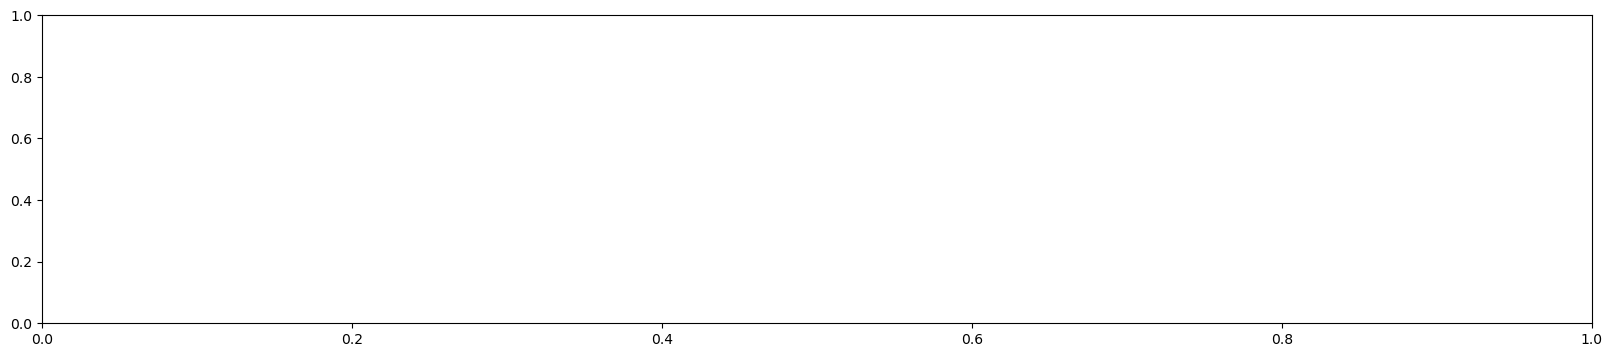

In [66]:
# Total Injuries by Car Make

# Set x axis and tick locations
x_axis = np.arange(len(make1000))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,4))
plt.bar(x_axis, replace_df["Total Injuries"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, replace_df["Make"], rotation="vertical")

# Set a Title and labels
plt.title("Total Injuries by Make of Car")
plt.xlabel("Make")
plt.ylabel("Total Injuries")

# Save our graph and show the grap
plt.tight_layout()
# plt.savefig("../Images/Total Injuries by Make.png")
plt.show()

# Datalab - Scatter Plots

In [ ]:
# The maximum x value for our chart will be 100
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 1)

# Create a random array of data that we will use for our y values
data = [random.random() for value in x_axis]

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(0, 1)

# The x limits of our scatter plot is 0 to 100
plt.xlim(0, x_limit)

# Prints the scatter plot to the screen
plt.show()

In [ ]:
car_df_groupby_make = car_df.groupby('Make')
car_df_groupby_make

In [ ]:
print(chicago_df["Make"].value_counts())
pd.options.display.max_rows = 800

In [ ]:
def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolacator.reverse(df(lat_field), df(lon_field))
    return location.raw['address']['postcode']
    
geolocator = geopy.Nominatim(user_agent='1234')

df = pd.DataFrame({
    'Lat': []
    'Lon':[]
})
    